# Descripción del proyecto
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Tienes que:

- Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
- Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
- Analizar los factores que más impactan la pérdida.
- Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
  - identificar a los grupos objetivo;
  - sugerir medidas para reducir la rotación;
  - describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

# Paso 1. Descargar los datos

Model Fitness te aportó archivos CSV que contienen los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía. El dataset incluye los siguientes campos:

- **'Churn'** — la cancelación para el mes en cuestión
- Campos de dataset actuales:
  - Datos del usuario del mes anterior
    - 'gender'.
    - 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
    - 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
    - Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
    - 'Phone' — si el/la usuario/a aportó el número de teléfono.
    - 'Age'.
    - 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.

- Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:
  - 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
  - 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
  - 'Group_visits' — si el/la usuario/a participa en sesiones grupales.
  - 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
  - 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
  - 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

Ruta de archivo: [/datasets/gym_churn_us.csv. Descargar el dataset.](https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gym_churn_us.csv)



## Importe de librerías, creación de DataFrames y revisión preliminar de la información:

In [1]:
#Importe de librerías a usar en el desarrollo del proyecto:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una buena práctica para cuando tengas que importar varias librerías es seguir el siguiente órden en las mismas:

- Primero todas las librerías que vienen ya con python cómo `datetime`, `os`, `json`, etc.
- Luego de las librerías de Python si las de terceros cómo `pandas`, `scipy`, `numpy`, etc.
- Por último, en el caso de que armes tu propio módulo en tu proyecto esto debería ir en tercer lugar, y recuerda siempre ordenar cada tipo por orden alfabético
    
Para cada sección se deben ordenar en orden alfabético
</div>

In [2]:
#Lectura de datasets como fuente de datos y creación de DataFrames a desarrollar:

df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gym_churn_us.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Carga de datos correcta, bien hecho!
</div>

In [3]:
#Revisión general de la información:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
df.sample(20)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1510,0,1,1,0,1,1,1,34,100.301087,1.0,0,1.730445,1.619220,0
2410,1,1,1,1,1,12,1,37,331.659379,12.0,2,2.262743,2.202970,0
1580,0,1,0,1,1,1,0,29,328.247383,1.0,0,0.473912,0.405892,1
3311,1,0,1,0,1,1,0,25,83.727828,1.0,0,1.963836,1.469899,1
476,0,1,1,0,1,6,0,30,92.025681,6.0,1,1.648647,1.600197,0
3984,1,1,0,0,1,6,1,22,101.107544,6.0,2,1.377860,0.343915,1
1943,1,1,0,0,1,12,1,35,255.232179,12.0,6,1.212014,1.496978,0
2637,0,1,1,0,1,12,0,31,230.838814,7.0,3,1.901642,1.937500,0
2830,1,0,0,0,1,1,0,26,198.072188,1.0,1,0.353186,0.000000,1
3563,1,1,1,0,1,6,1,33,218.397713,5.0,6,0.747376,0.679235,0


Podemos destacar de manera inicial que el dataset gym_churn_us.csv almacenado en el DataFrame df **no contiene datos nulos en ninguna columna de sus 4000 registros**.

Por otro lado las columnas serán pasadas a formato tipo snake_case.

In [5]:
# Transformación de columnas a tipo snake_case:

def snake_case_columns(column): # Función para reemplazar columnas de cualquier DataFrame con el formato deseado
    
    revised_col_names = [] #---> Lista para almacenar los nombres de columnas corregidos
    
    for old_name in column:
        name_lowered = old_name.lower() #Transformación de columnas a minúsculas
        revised_col_names.append(name_lowered)
    return revised_col_names

# Estandarización de las columnas a través del uso de la función snake_case_columns:
df.columns = snake_case_columns(df.columns)
display(df.info())       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

None

## Paso 2. Llevar a cabo el análisis exploratorio de datos (EDA)

- Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).
- Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).
- Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
- Crea una matriz de correlación y muéstrala.

### Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

1. Como vimos en la revisión preliminar de la información, no existen datos nulos/ausentes en el DataFrame. Todos los 4000 registros contienen información No-Nula.

2. Valores promedio y desviación estándar (uso de método .describe())

In [6]:
# Revisión de valores promedio y desviación estándar en cada columna:

df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Nuestra variable de interés principal 'churn' tiene una media cercana al 27% de los datos, es decir, en promedio el 27% de los usuarios han cancelado en algún momento su membresía. 
La desviación estandar como valor 0.44 esto indica una variabilidad considerable en la tasa de churn entre los clientes. Esta alta variabilidad sugiere que hay segmentos de clientes con comportamientos muy diferentes en cuanto a la retención y el abandono.

###  Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [7]:
# Identificamos previamente que los valores 1 aplican para aquellos usuarios que cancelaron y 0 para los que siguen con su plan en la columna 'churn':

# 1 ---> Cancelaron
# 0 ---> Continúan

mean_churn_population = df.groupby('churn').mean()

mean_churn_population

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


En la variable mean_churn_population se puede ver que quienes cancelaron la membresía tienen una edad promedio cercana a los 27 años, en promedio apenas cumplían su primer mes de membresía (lifetime), y faltaban menos de 2 meses para terminar el contrato. Adicional a ello, el promedio de visitas al gimnasio por semana era inferior a 2 (tanto para el historial total, como el historial del mes en estudio).

### Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

'gender'

Comportamiento por gender de usuarios que cancelaron:


count    1061.000000
mean        0.510839
std         0.500118
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

Comportamiento por gender de usuarios activos:


count    2939.000000
mean        0.510037
std         0.499984
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

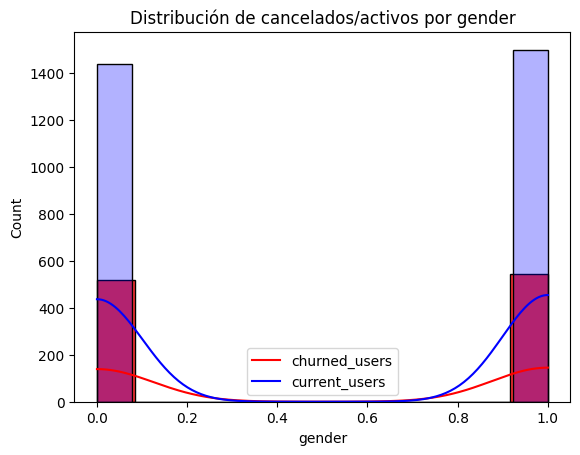

'near_location'

Comportamiento por near_location de usuarios que cancelaron:


count    1061.000000
mean        0.768143
std         0.422217
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: near_location, dtype: float64

Comportamiento por near_location de usuarios activos:


count    2939.000000
mean        0.873086
std         0.332933
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: near_location, dtype: float64

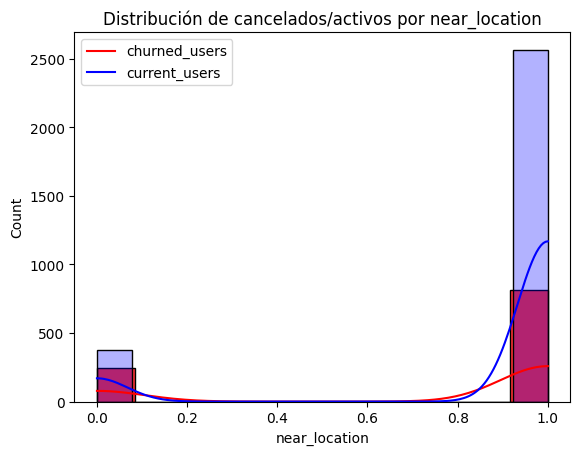

'partner'

Comportamiento por partner de usuarios que cancelaron:


count    1061.000000
mean        0.355325
std         0.478837
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: partner, dtype: float64

Comportamiento por partner de usuarios activos:


count    2939.000000
mean        0.534195
std         0.498914
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: partner, dtype: float64

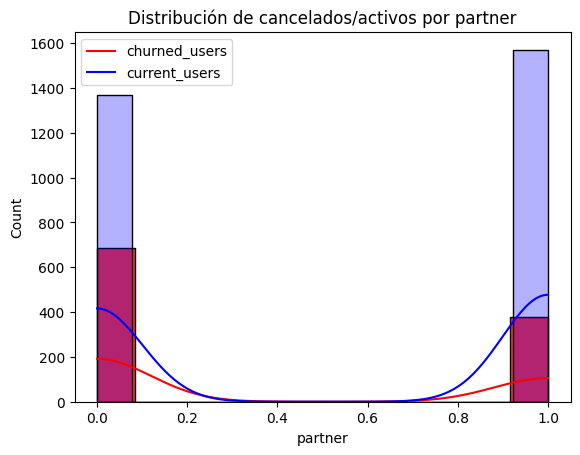

'promo_friends'

Comportamiento por promo_friends de usuarios que cancelaron:


count    1061.000000
mean        0.183789
std         0.387495
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: promo_friends, dtype: float64

Comportamiento por promo_friends de usuarios activos:


count    2939.000000
mean        0.353522
std         0.478144
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: promo_friends, dtype: float64

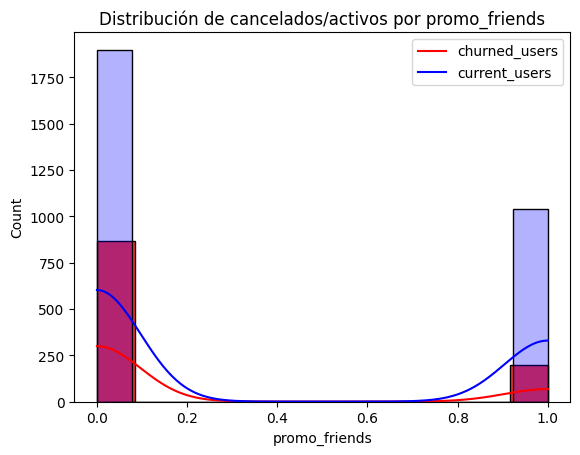

'phone'

Comportamiento por phone de usuarios que cancelaron:


count    1061.000000
mean        0.902922
std         0.296204
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: phone, dtype: float64

Comportamiento por phone de usuarios activos:


count    2939.000000
mean        0.903709
std         0.295040
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: phone, dtype: float64

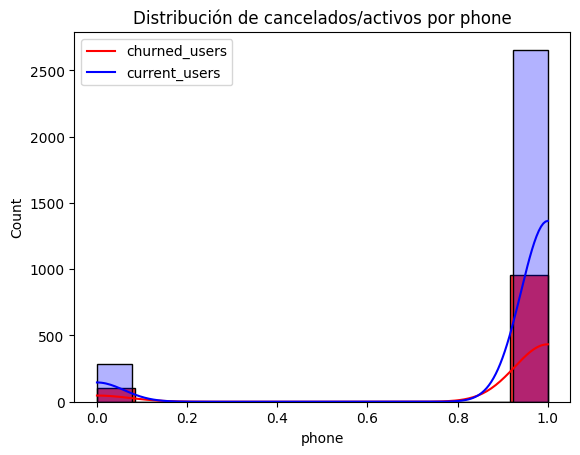

'contract_period'

Comportamiento por contract_period de usuarios que cancelaron:


count    1061.000000
mean        1.728558
std         2.132371
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        12.000000
Name: contract_period, dtype: float64

Comportamiento por contract_period de usuarios activos:


count    2939.000000
mean        5.747193
std         4.716942
min         1.000000
25%         1.000000
50%         6.000000
75%        12.000000
max        12.000000
Name: contract_period, dtype: float64

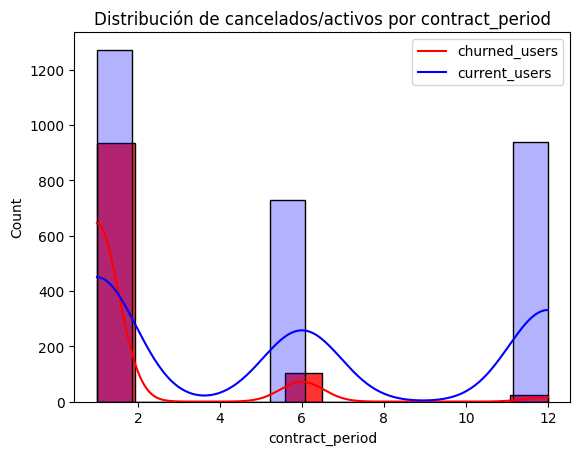

'group_visits'

Comportamiento por group_visits de usuarios que cancelaron:


count    1061.000000
mean        0.268615
std         0.443448
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: group_visits, dtype: float64

Comportamiento por group_visits de usuarios activos:


count    2939.000000
mean        0.464103
std         0.498795
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: group_visits, dtype: float64

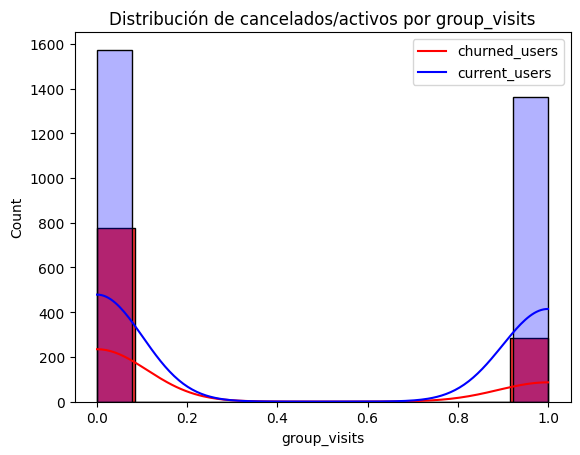

'age'

Comportamiento por age de usuarios que cancelaron:


count    1061.000000
mean       26.989632
std         2.895163
min        18.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        38.000000
Name: age, dtype: float64

Comportamiento por age de usuarios activos:


count    2939.000000
mean       29.976523
std         3.009933
min        19.000000
25%        28.000000
50%        30.000000
75%        32.000000
max        41.000000
Name: age, dtype: float64

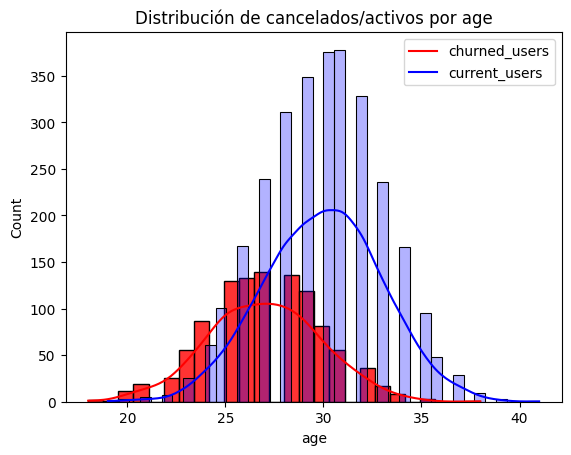

'avg_additional_charges_total'

Comportamiento por avg_additional_charges_total de usuarios que cancelaron:


count    1061.000000
mean      115.082899
std        77.696419
min         0.148205
25%        50.629127
50%       103.814686
75%       165.616858
max       425.535220
Name: avg_additional_charges_total, dtype: float64

Comportamiento por avg_additional_charges_total de usuarios activos:


count    2939.000000
mean      158.445715
std        99.801599
min         0.171862
25%        76.920993
50%       149.881171
75%       224.448274
max       552.590740
Name: avg_additional_charges_total, dtype: float64

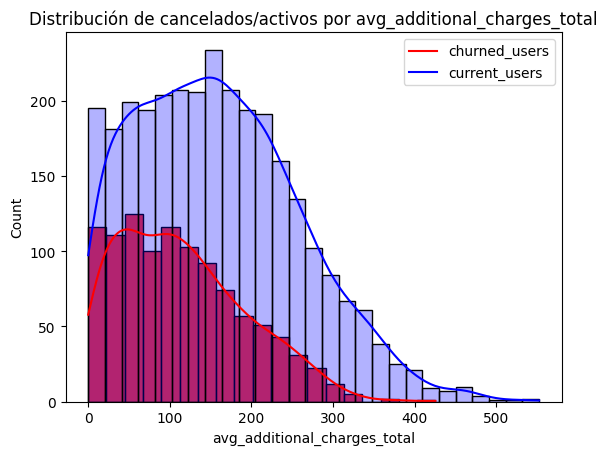

'month_to_end_contract'

Comportamiento por month_to_end_contract de usuarios que cancelaron:


count    1061.000000
mean        1.662582
std         1.964593
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        12.000000
Name: month_to_end_contract, dtype: float64

Comportamiento por month_to_end_contract de usuarios activos:


count    2939.000000
mean        5.283089
std         4.363522
min         1.000000
25%         1.000000
50%         6.000000
75%        10.000000
max        12.000000
Name: month_to_end_contract, dtype: float64

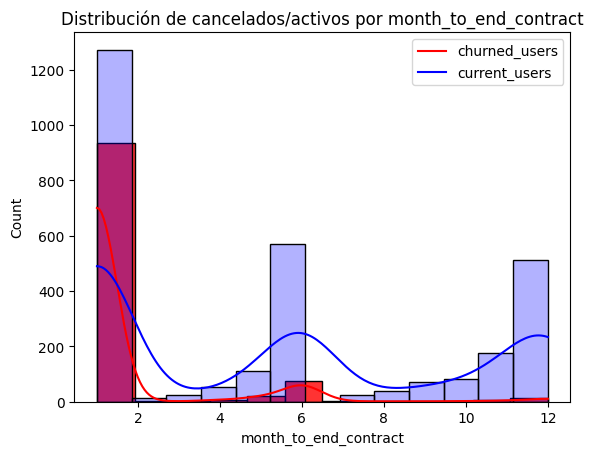

'lifetime'

Comportamiento por lifetime de usuarios que cancelaron:


count    1061.000000
mean        0.990575
std         1.110799
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         9.000000
Name: lifetime, dtype: float64

Comportamiento por lifetime de usuarios activos:


count    2939.000000
mean        4.711807
std         3.874780
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        31.000000
Name: lifetime, dtype: float64

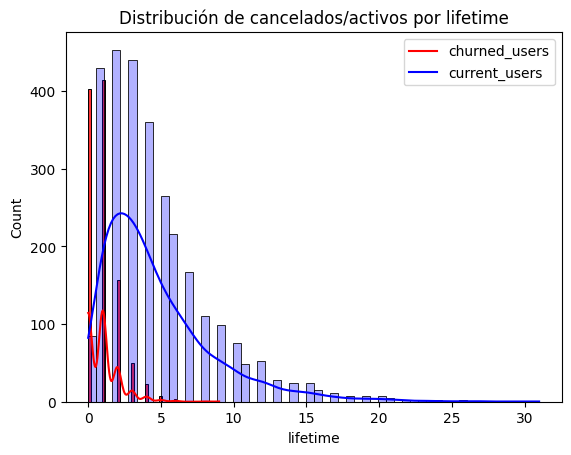

'avg_class_frequency_total'

Comportamiento por avg_class_frequency_total de usuarios que cancelaron:


count    1061.000000
mean        1.474995
std         0.694705
min         0.000000
25%         1.010771
50%         1.491187
75%         1.956438
max         3.478646
Name: avg_class_frequency_total, dtype: float64

Comportamiento por avg_class_frequency_total de usuarios activos:


count    2939.000000
mean        2.024876
std         1.016006
min         0.000000
25%         1.283137
50%         2.043252
75%         2.732944
max         6.023668
Name: avg_class_frequency_total, dtype: float64

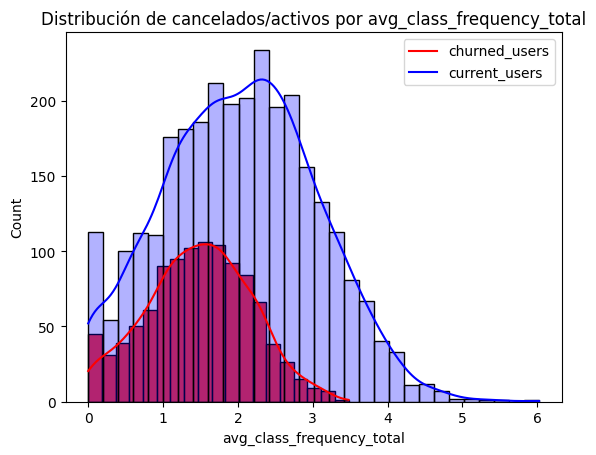

'avg_class_frequency_current_month'

Comportamiento por avg_class_frequency_current_month de usuarios que cancelaron:


count    1061.000000
mean        1.044546
std         0.770237
min         0.000000
25%         0.421337
50%         0.979445
75%         1.588576
max         3.540271
Name: avg_class_frequency_current_month, dtype: float64

Comportamiento por avg_class_frequency_current_month de usuarios activos:


count    2939.000000
mean        2.027882
std         1.018994
min         0.000000
25%         1.297021
50%         2.046697
75%         2.740648
max         6.146783
Name: avg_class_frequency_current_month, dtype: float64

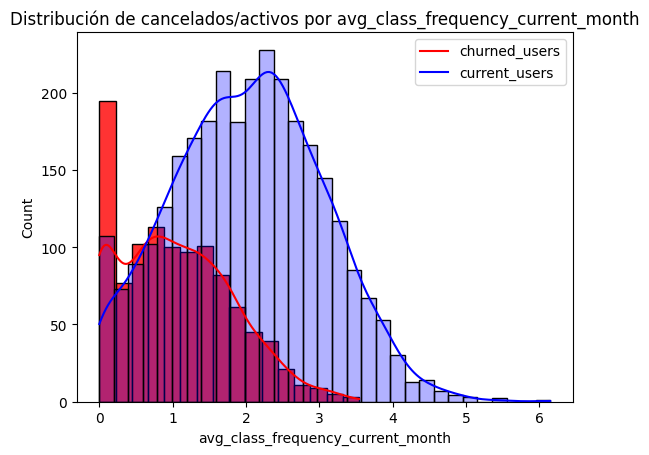

No aplica para churn


In [8]:
# Inicialmente dividiremos la población entre aquellos usuarios que cancelaron (churn = 1) y los que no (churn = 0):

churned_users = df[df['churn'] == 1] # Usuarios que cancelaron la membresía
current_users = df[df['churn'] == 0] # Usuarios que con membresía activa


# Ahora procederemos a crear un bucle que genere las gráficas y estadísticas para cada característica:

for i in df.columns:
    if i == 'churn':
        print('No aplica para churn')
    else:
        name = i
        display(name)
        print('Comportamiento por', i, 'de usuarios que cancelaron:')
        display(churned_users[i].describe())
        print('Comportamiento por', i, 'de usuarios activos:')
        display(current_users[i].describe())
        sns.histplot(data= churned_users[i], kde=True, color='red', alpha=0.8)
        sns.histplot(data= current_users[i], kde=True, color='blue', alpha=0.3)
        plt.legend(['churned_users', 'current_users'])
        plt.title('Distribución de cancelados/activos por {}'.format(i))
        plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Esta gráfica es muy clara para mostrar las diferencias entre cada variable de tu dataset
</div>

### Revisión de percentiles en casos particulares:

In [9]:
#Percentiles detallados para el caso 'partner':

print(churned_users['partner'].quantile([0.64]))
print(churned_users['partner'].quantile([0.65]))
print()
print(current_users['partner'].quantile([0.46]))
print(current_users['partner'].quantile([0.47]))

0.64    0.0
Name: partner, dtype: float64
0.65    1.0
Name: partner, dtype: float64

0.46    0.0
Name: partner, dtype: float64
0.47    1.0
Name: partner, dtype: float64


In [10]:
#Percentiles detallados para el caso 'promo_friends':

print(churned_users['promo_friends'].quantile([0.81]))
print(churned_users['promo_friends'].quantile([0.82]))
print()
print(current_users['promo_friends'].quantile([0.64]))
print(current_users['promo_friends'].quantile([0.65]))

0.81    0.0
Name: promo_friends, dtype: float64
0.82    1.0
Name: promo_friends, dtype: float64

0.64    0.0
Name: promo_friends, dtype: float64
0.65    1.0
Name: promo_friends, dtype: float64


In [11]:
#Percentiles detallados para el caso 'phone':

print(churned_users['phone'].quantile([0.09]))
print(churned_users['phone'].quantile([0.1]))
print()
print(current_users['phone'].quantile([0.09]))
print(current_users['phone'].quantile([0.1]))

0.09    0.0
Name: phone, dtype: float64
0.1    1.0
Name: phone, dtype: float64

0.09    0.0
Name: phone, dtype: float64
0.1    1.0
Name: phone, dtype: float64


In [12]:
# Percentiles detallados para el caso 'contract_period':

print(churned_users['contract_period'].quantile([0.88]))
print(churned_users['contract_period'].quantile([0.89]))
print(churned_users['contract_period'].quantile([0.98]))
print()
print(current_users['contract_period'].quantile([0.43]))
print(current_users['contract_period'].quantile([0.68]))
print(current_users['contract_period'].quantile([0.69]))

0.88    1.0
Name: contract_period, dtype: float64
0.89    6.0
Name: contract_period, dtype: float64
0.98    12.0
Name: contract_period, dtype: float64

0.43    1.0
Name: contract_period, dtype: float64
0.68    6.0
Name: contract_period, dtype: float64
0.69    12.0
Name: contract_period, dtype: float64


In [13]:
# Percentiles detallados para el caso 'group_visits':

print(churned_users['group_visits'].quantile([0.73]))
print(churned_users['group_visits'].quantile([0.74]))
print()
print(current_users['group_visits'].quantile([0.53]))
print(current_users['group_visits'].quantile([0.54]))

0.73    0.0
Name: group_visits, dtype: float64
0.74    1.0
Name: group_visits, dtype: float64

0.53    0.0
Name: group_visits, dtype: float64
0.54    1.0
Name: group_visits, dtype: float64


In [14]:
# Percentiles detallados para el caso 'month_to_end_contract':

print(churned_users['month_to_end_contract'].quantile([0.88]))
print(churned_users['month_to_end_contract'].quantile([0.89]))
print()
print(current_users['month_to_end_contract'].quantile([0.43]))
print(current_users['month_to_end_contract'].quantile([0.69]))

0.88    1.0
Name: month_to_end_contract, dtype: float64
0.89    4.4
Name: month_to_end_contract, dtype: float64

0.43    1.0
Name: month_to_end_contract, dtype: float64
0.69    6.0
Name: month_to_end_contract, dtype: float64


### Conclusión Histogramas:

De  las gráficas anteriores podemos concluir lo siguiente:

1. La distribución por género es muy pareja entre ambas poblaciones. Una distribución casi del 50/50.
2. Para ambas poblaciones, la gran mayoría de usuarios vive cerca al gimnasio.
3. La mayor parte de los usuarios que cancelaron no eran asociados a una empresa (mayor al 64%); mientras que los usuarios activos en su gran mayoría son asociados a empresa (mayor al 53%).
4. En el caso de promo_friends, tanto los casos de cancelados, como los activos, en su gran mayoría no fueron usuarios referidos por amigos (en el caso de los usuarios que cancelaron no fueron referidos en más del 80% de los casos, en el caso de los activos en el 64% de los casos).
5. Más del 90% de los usuarios sí registraron su número telefónico.
6. La gran mayoría de usuarios tienen una membresía de un sólo mes, y como se puede ver, la mayor parte de los usuarios que cancelaron tienen esta condición (El 88% de los usuarios que cancelaron).
7. El 73% de los usuarios que cancelaron NO formaron parte de sesiones grupales mientras fueron miembros.
8. Los usuarios que cancelaron manejan un rango de edad entre 18 y 38 años, con una media muy cercana a la mediana (27 años). Mientras que los usuarios activos se encuentran entre 19 y 41 años con una media muy cercana a la mediana (30 años).
9. El comportamiento de gastos en servicios adicionales es muy similar tanto para los usuarios que cancelaron como para los que siguen activos (el 75% de los usuarios que cancelaron gastaron menos de 166 dólares, mientras que el 75% de los usuarios activos gastaron menos de 225 dólares).
10. Más del 88% de los usuarios que cancelaron les faltaba un mes para completar el plan. Mientras 57% de los activos tienen 2 meses o más para completar el plan.
11. El 75% de los usuarios que cancelaron llevaban máximo un mes de estar vinculados al gimnasio, mientras que el 75% de los activos tienen una antigüedad mayor a los 2 meses.
12. El 75% de los usuarios que cancelaron frecuentaban el gimnasio menos de 2 veces por semana tanto a lo largo de su membresía como en el mes de análisis, mientras que los usuarios activos registran como mediana y promedio 2 visitas por semana con máximos de 6 visitas (tanto a lo largo de la membresía como en el mes de estudio).

### Crea una matriz de correlación y muéstrala.

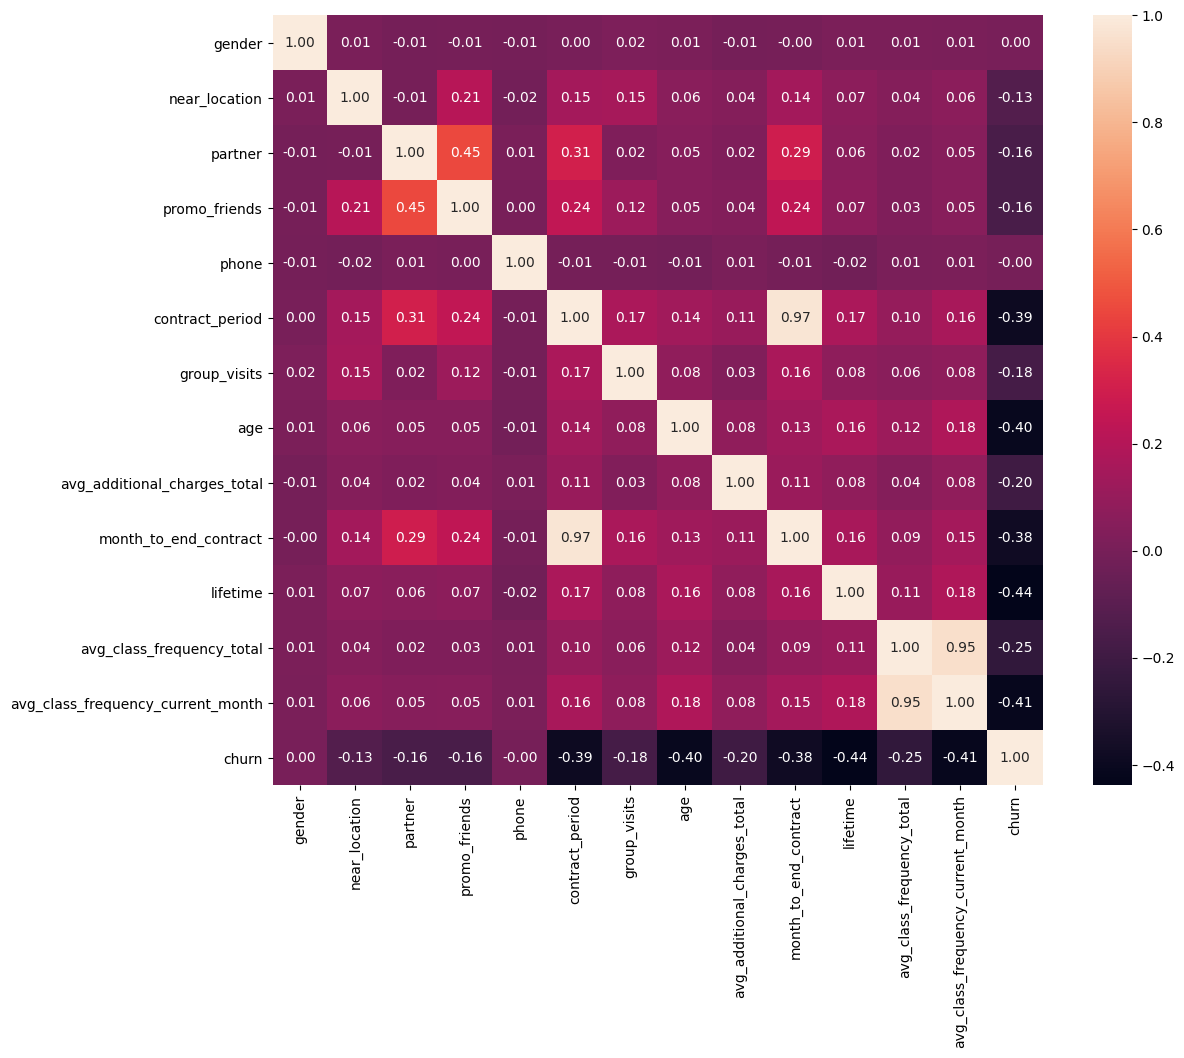

In [15]:
# Matriz de correlación
corr_mat = df.corr()

# Gráfica de mapa de calor
plt.figure(figsize=(13, 10))
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f')
plt.show()

Las correlaciones positivas fuertes están relacionadas entre la frecuencia de visitas durante la semana (tanto para los datos históricos como para el mes de estudio), el periodo contratado y el tiempo restante a finalizar la suscripción y finalmente si los usuarios fueron referidos por un amigo y los convenios de empresas (relación de descuentos y códigos promocionales).

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto! la visualización es muy clara para poder comparar
</div>

## Paso 3. Construir un modelo para predecir la cancelación de usuarios

Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

- Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
- Entrena el modelo en el set de entrenamiento con dos métodos:
    1. regresión logística;
    2. bosque aleatorio.

- Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

Recuerda indicar el parámetro random_state cuando dividas los datos y definas el algoritmo.

Según la [información relacionada sobre como Resolver tareas relacionadas con Machine learning](https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/DA_sprint_12/ES/additional_materials/Hoja_informativa_Resolver_tareas_relacionadas_con_machine_learning.pdf), definiremos lo siguiente:

In [16]:
# Inicialmente se definirán las métricas de entrenamiento y validación:

# División de los datos en características (la matriz X) y la variable objetivo (y):
X = df.drop('churn', axis=1)
y = df['churn']

# División de los datos en entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Uso de StandardScaler en el conjunto de entrenamiento:
scaler = StandardScaler()
scaler.fit(X_train)

# Transformación de los conjuntos de entrenamiento y de prueba usando scaler.transform:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)



#Ahora procederemos a crear una función que imprima las métricas de exactitud, precisión y recall para los modelos:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Métricas de clasificación'):
    print(title)
    print('\tExactitud: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecisión: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))


# Definición del algoritmo para el modelo de regresión logística:
lr_model = LogisticRegression(random_state=0)
# Entrena el modelo
lr_model.fit(X_train_st, y_train)
# Utiliza el modelo entrenado para hacer previsiones
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# muestra todas las métricas
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Métricas de regresión logística:')

print()

# Definición del algoritmo para el nuevo modelo de random forest:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# entrena el modelo de random forest
rf_model.fit(X_train_st, y_train)
# utiliza el modelo entrenado para hacer previsiones
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
# muestra todas las métricas
print_all_metrics(y_test, rf_predictions, rf_probabilities, title='Métricas de random forest:')

Métricas de regresión logística:
	Exactitud: 0.92
	Precisión: 0.85
	Recall: 0.83

Métricas de random forest:
	Exactitud: 0.92
	Precisión: 0.84
	Recall: 0.81


En este caso específico la Regresión logística generó mejores resultados en Precisión y Recall versus el método de Bosque Aleatorio a pesar que la diferencia es apenas de 1 centésima en ambos casos.

De todos modos, cabe mencionar que hay que evaluar también la velocidad de respuestas de los modelos, la capacidad de re-entrenamiento y la complejidad de los escenarios a la hora de llegar a conclusiones definitivas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto! Buen trabajo con el entrenamiento de los modelos y la interpretación de los resultados
</div>

## Paso 4. Crear clústeres de usuarios/as
Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

- Estandariza los datos.

- Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

- Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

- Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

- Traza distribuciones de características para los clústeres. ¿Notas algo?

- Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

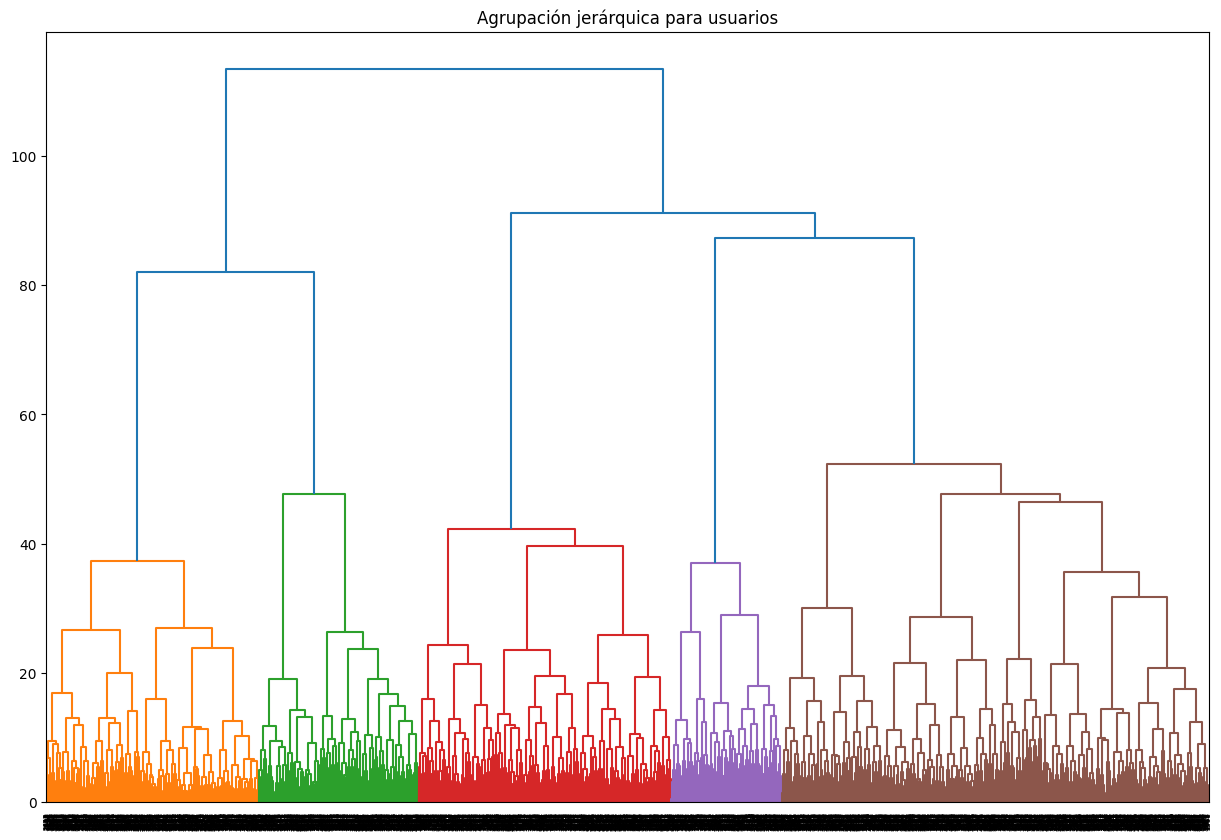

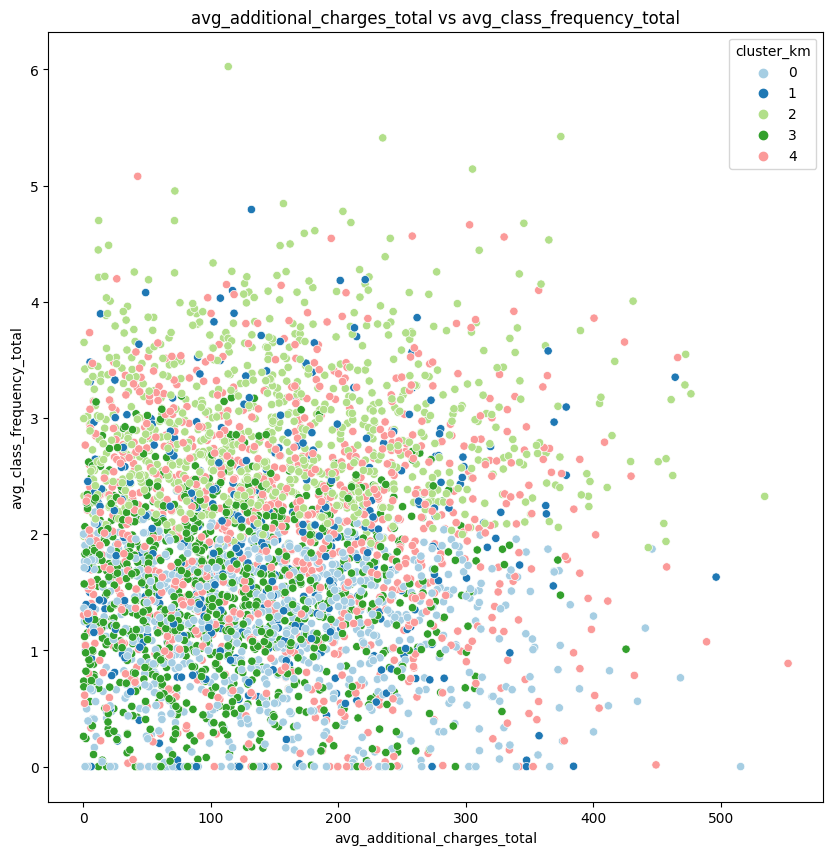

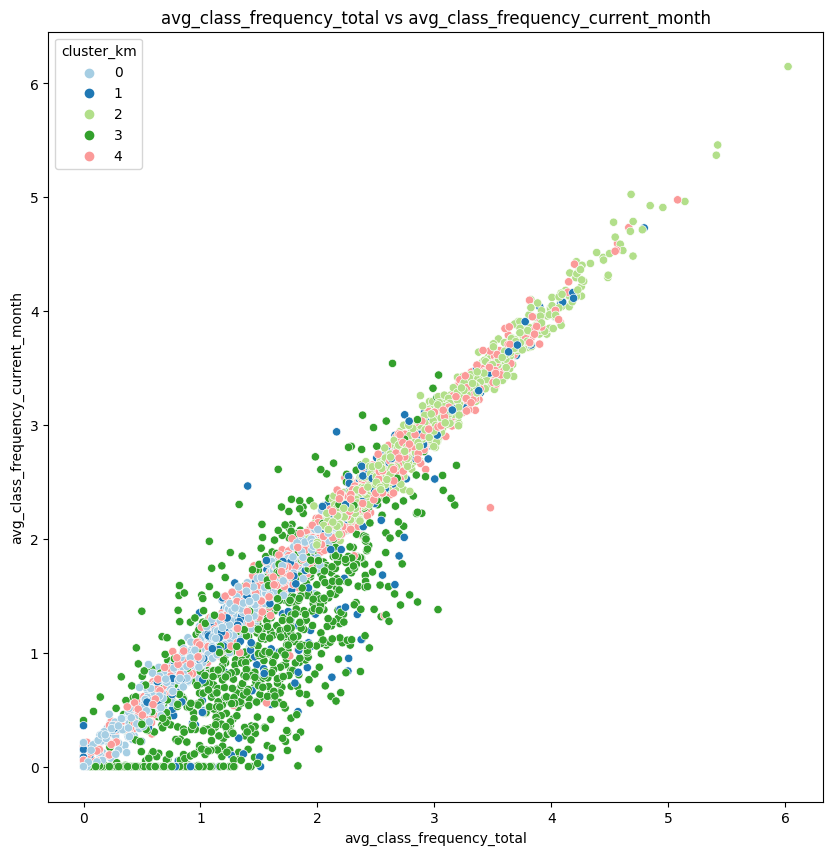

In [17]:
# Creación de la función para representar gráficos de características pareadas para los clústeres:
def show_clusters_on_plot(data, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    # Pass column names as arguments, not the arrays
    sns.scatterplot(x= data[x_name], y=data[y_name], hue=data[cluster_name], data=data, palette = 'Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()


# estandariza los datos
sc = StandardScaler()
X_sc = sc.fit_transform(df)
linked = linkage(X_sc, method = 'ward')

# define el modelo k_means con 5 clústeres
km = KMeans(n_clusters = 5)
# predice los clústeres para las observaciones (el algoritmo les asigna un número de 0 a 4)
labels = km.fit_predict(X_sc)

# almacena etiquetas de clúster en el campo de nuestro conjunto de datos
df['cluster_km'] = labels

# obtiene las estadísticas de los valores medios de las características por clúster
df.groupby(['cluster_km']).mean()

# Gráfica de un dendrograma
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para usuarios')
plt.show()

# representa el gráfico para las características pareadas de "cargos adicionales del servicio de gimnasio" y "frecuencia de visitas por semana (histórico)":
show_clusters_on_plot(df, 'avg_additional_charges_total', 'avg_class_frequency_total', 'cluster_km')

# representa el gráfico para las características pareadas de "frecuencia de visitas por semana (histórico)" y "frecuencia de visitas por semana (mes en curso)":
show_clusters_on_plot(df, 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'cluster_km')

In [18]:
# Tasa de cancelación por cada clúster:
#1: Cancelaron
#0: Vigentes
grp_cluster = df.groupby(['cluster_km'])['churn'].mean().reset_index()
display(grp_cluster)

,cluster_km,churn
0,0,0.001159
1,1,0.263708
2,2,0.007075
3,3,0.997872
4,4,0.015528


En este caso el Cluster con mayor tasa de cancelación promedio tiene es la número 2, mientras la que presenta promedios más bajos es el Clúster 3.

Los primeros 3 clusters tienen mayores valores promedio de cancelación respecto a los últimos 2.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la segmentación e interpretación de los grupos obtenidos
</div>

## Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes
Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.

No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.

### Conclusiones y Recomendaciones Estratégicas para la Interacción y Retención de Clientes

Basándonos en el análisis de clustering y la tasa de cancelación por clúster, podemos extraer algunas conclusiones clave y formular recomendaciones estratégicas para mejorar la retención de clientes. A continuación, se presentan tres principios esenciales junto con ejemplos específicos de pasos de marketing:

1. **Personalización de la Comunicación y Ofertas:** / **Fortalecer las Estrategias en el Cluster 3:**

- Potenciar los beneficios y características que hacen atractivo el Cluster 3.
- Crear campañas que resalten las ventajas del Cluster 3, utilizando testimonios de clientes satisfechos.
- Ofrecer recompensas adicionales a los miembros de este cluster para mantener su satisfacción y fidelidad.

**Ejemplos:**
    -  Para clústeres con alto uso de instalaciones pero baja asistencia a clases grupales, ofrecer promociones en clases grupales o entrenamientos personales para diversificar su experiencia.
    -  Enviar correos electrónicos personalizados con recomendaciones basadas en sus patrones de uso.

2. **Programas de Fidelización Específicos:**
- Clústeres con altas tasas de cancelación (como los 3 primeros clústeres) indican una menor fidelidad al gimnasio.
- Se podría implementar programas de fidelización que premien la lealtad y la frecuencia de uso.
**Ejemplos:**
    - Crear un sistema de puntos donde los clientes acumulan puntos por cada visita, los cuales pueden canjear por descuentos en membresías futuras o productos en la tienda del gimnasio.
    - Ofrecer membresías con beneficios adicionales para los clientes que renuevan por períodos más largos, como acceso a eventos exclusivos o sesiones gratuitas con entrenadores.

3. **Mejora de la Experiencia del Cliente:**
- Las diferencias en la satisfacción y el uso de las instalaciones pueden influir en la retención. Se puede mejorar continuamente las instalaciones y servicios basándose en el feedback de los clientes y en las observaciones del análisis de clústeres.
**Ejemplos:**
    - Realizar encuestas periódicas para obtener opiniones sobre qué mejoras desean ver en el gimnasio.
    - Invertir en la actualización de equipos y en la oferta de nuevas clases que respondan a las tendencias actuales y a las preferencias de los clústeres más insatisfechos.

4. **Fortalecer el programa de referidos:**
- Viendo la alta correlación existente entre descuentos de referidos y promociones por empresas con convenios de descuento, se pueden establecer estrategias de premios a aquellos usuarios que acumulen cierta cantidad de referidos y/o hayan usado continuamente los convenios del gimnasio con empresas. 
- Esto ayudará a mejorar la fidelidad de aquellos usuarios activos y obtener mejores reseñas que generen publicidad "voz a voz" para atraer nuevos usuarios.

<div class="alert alert-block alert-info">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo Christian, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Te felicito por las conclusiones planteadas luego de ver los resultados de la segmentación utilizando los cluster, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
Saludos!
</div>